In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
'''keras.datasets.mnist: This is a module in the Keras library that provides access to the MNIST dataset. The MNIST dataset is a collection of 28x28 pixel grayscale images of handwritten digits (0 through 9) and their corresponding labels.

load_data(): This function is called on the MNIST module to load the dataset. It returns a tuple containing two tuples. The first tuple ((X_train, y_train)) contains the training data, while the second tuple '''



'keras.datasets.mnist: This is a module in the Keras library that provides access to the MNIST dataset. The MNIST dataset is a collection of 28x28 pixel grayscale images of handwritten digits (0 through 9) and their corresponding labels.\n\nload_data(): This function is called on the MNIST module to load the dataset. It returns a tuple containing two tuples. The first tuple ((X_train, y_train)) contains the training data, while the second tuple '

In [6]:
len(X_train)

60000

In [7]:
len(y_train)

60000

In [8]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


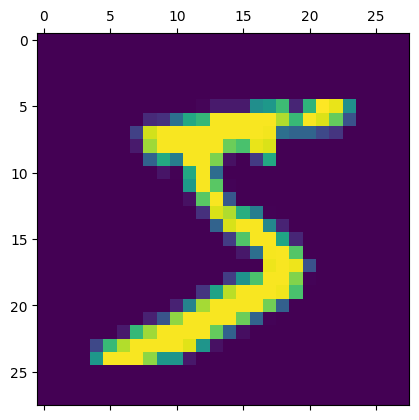

In [19]:
print(y_train[0])
plt.matshow(X_train[0])

1


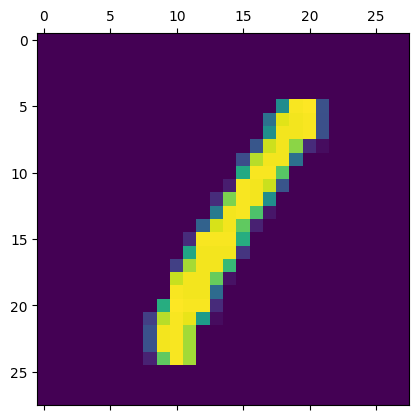

In [18]:
plt.matshow(X_train[3])
print(y_train[3])

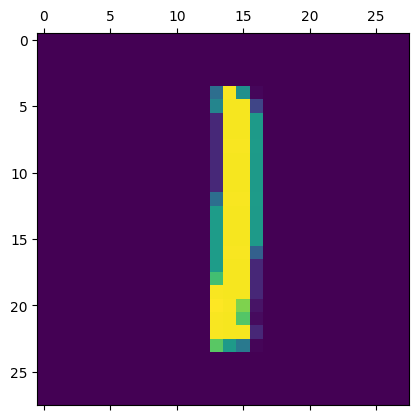

In [14]:
plt.matshow(X_train[678])

In [16]:
y_train[678]

1

In [20]:
X_train.shape

(60000, 28, 28)

In [43]:
X_train=X_train/255
X_test=X_test/255

In [44]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
#turned it into 2 dimension
X_train_flattened.shape

(60000, 784)

In [45]:
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [54]:



#defining neural network
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
                                                 ])
model.compile(
 optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
    
)

model.fit(X_train_flattened,y_train,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1868 - accuracy: 0.5885
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9755 - accuracy: 0.7041
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7890 - accuracy: 0.7390
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6252 - accuracy: 0.7600
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4826 - accuracy: 0.7750
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3592 - accuracy: 0.7883
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2526 - accuracy: 0.7991
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1606 - accuracy: 0.8076
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0814 - accuracy: 0.8157
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.013

In [55]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9631 - accuracy: 0.8378


[0.9631271362304688, 0.8378000259399414]

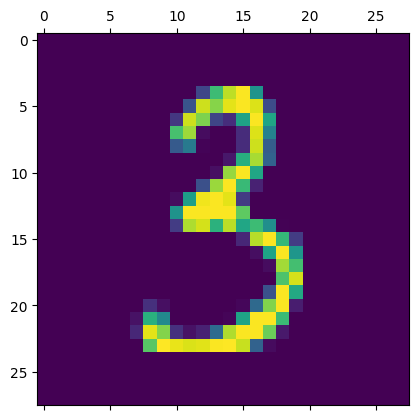

In [61]:
plt.matshow(X_test[76
            ])


In [62]:
y_predicted=model.predict(X_test_flattened)
y_predicted[76]

313/313 [==============================] - 1s 3ms/step


array([0.26340172, 0.56920326, 0.2919492 , 0.82772124, 0.20682563,
       0.6364037 , 0.29214367, 0.22140679, 0.44471565, 0.23240481],
      dtype=float32)

In [63]:
np.argmax(y_predicted[76]
         )

3

In [65]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [66]:
y_test[:5]


array([7, 2, 1, 0, 4], dtype=uint8)

In [67]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 923,    1,    4,    9,    0,    9,   25,    1,    8,    0],
       [   0, 1097,    8,    4,    0,    2,    5,    0,   19,    0],
       [  17,   50,  816,   31,   21,    0,   32,   23,   41,    1],
       [   4,   24,   28,  883,    1,    6,    8,   20,   27,    9],
       [   2,   20,    3,    0,  843,    0,   25,    6,    7,   76],
       [  21,   60,    6,  144,   35,  536,   25,   29,   19,   17],
       [  19,   30,   11,    0,   17,   15,  864,    0,    2,    0],
       [   1,   54,   14,    3,   12,    0,    2,  907,    9,   26],
       [  17,   56,   10,   78,   16,   13,   17,   22,  723,   22],
       [  17,   23,    6,   13,   80,    5,    0,   70,    9,  786]])>

Text(95.72222222222221, 0.5, 'truth')

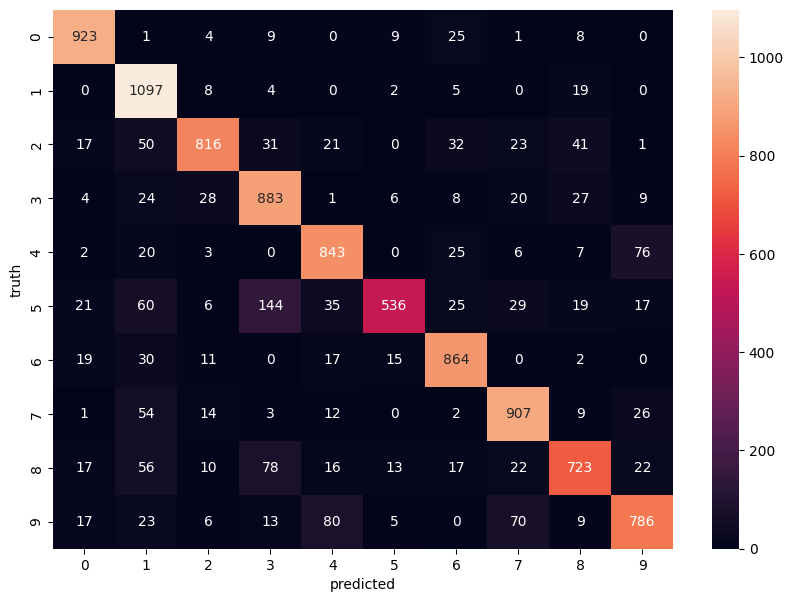

In [68]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [69]:
#defining neural network using hidden layer
model=keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
                                                 ])
model.compile(
 optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
    
)

model.fit(X_train_flattened,y_train,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.2068 - accuracy: 0.7095
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5072 - accuracy: 0.8698
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3918 - accuracy: 0.8936
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3473 - accuracy: 0.9026
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3227 - accuracy: 0.9078
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3058 - accuracy: 0.9129
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2931 - accuracy: 0.9159
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2830 - accuracy: 0.9192
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2735 - accuracy: 0.9209
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.26

In [70]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2576 - accuracy: 0.9246


[0.25760626792907715, 0.9246000051498413]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'truth')

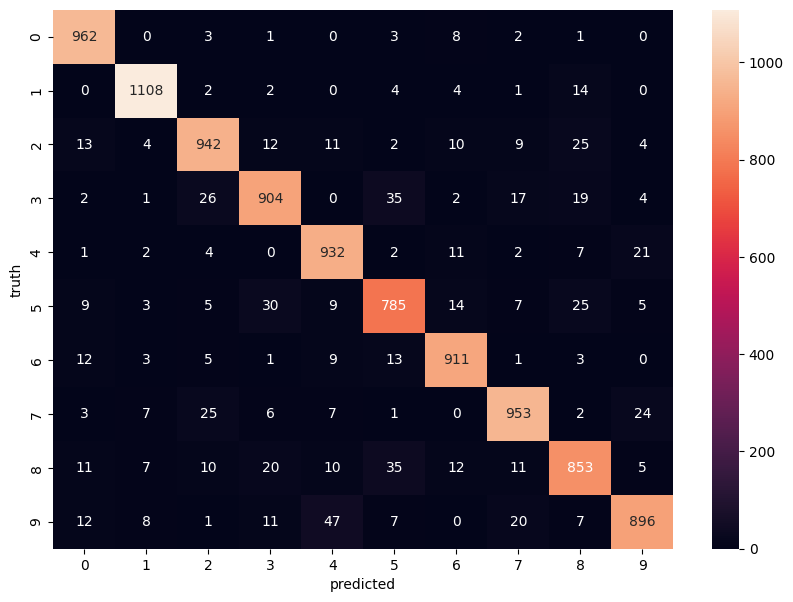

In [71]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
